# Data Cleaning Notebook
Goals of this notebook:
- Load in and process all the data files from twitch.
    - Stream Session Data
    - Channel Analytics

In [1]:
from glob import glob
import pandas as pd

import sys
sys.path.append('../src/')

from data_prep import process_stream_sessions, process_channel_analytics

In [2]:
raw_files = glob('../data/raw/*.csv')

In [3]:
ca_files = [f for f in raw_files if 'Channel Analytics' in f]
ss_files = [f for f in raw_files if 'Stream Session' in f]

print(f'{len(ca_files)} Channel Analytics Files - {len(ss_files)} Stream Session Files')

3 Channel Analytics Files - 29 Stream Session Files


## Process Stream Session Files

In [4]:
ss = process_stream_sessions()
ss.to_csv('../data/processed/StreamSession.csv', index=False)

<AxesSubplot:title={'center':'Viewers by Date'}, xlabel='datetime'>

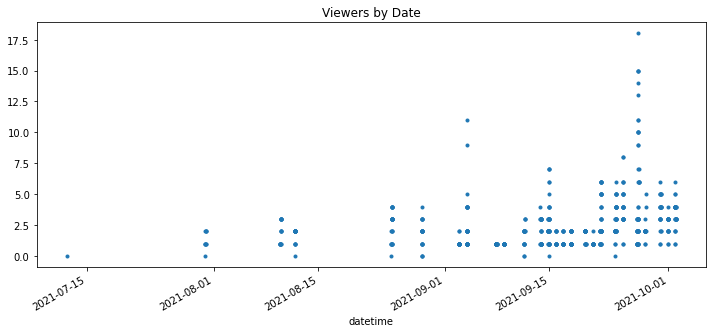

In [25]:
ss.set_index('datetime')['Viewers'].plot(figsize= (12, 5), style='.', title='Viewers by Date')

In [6]:
ss.head()

,session,datetime,Viewers,Live Views,New Followers,Chatters,Chat Messages,Ad Breaks,Subscriptions,Clips Created,All Clip Views
0,Stream Session from 9_3_2021 to 9_4_2021,2021-09-03 22:15:00,1,1,1,1,1,0,0,0,0
1,Stream Session from 9_3_2021 to 9_4_2021,2021-09-03 22:20:00,1,0,0,0,0,0,0,0,0
2,Stream Session from 9_3_2021 to 9_4_2021,2021-09-03 22:25:00,1,0,0,0,0,0,0,0,0
3,Stream Session from 9_3_2021 to 9_4_2021,2021-09-03 22:30:00,1,0,0,0,0,0,0,0,0
4,Stream Session from 9_3_2021 to 9_4_2021,2021-09-03 22:35:00,1,0,0,0,0,0,0,0,0


# Process Channel Analytics

In [7]:
ca = process_channel_analytics()

<AxesSubplot:xlabel='Date'>

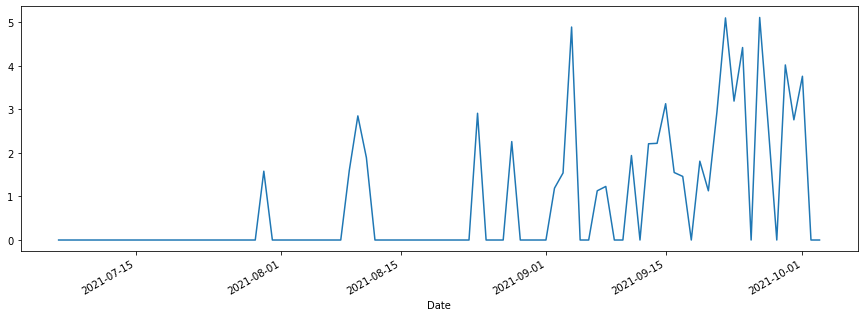

In [9]:
ca.set_index('Date')['Average_Viewers'].plot(figsize=(15, 5))

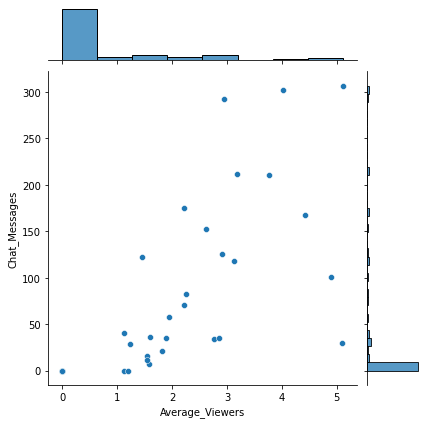

In [11]:
import seaborn as sns
sns.jointplot(x='Average_Viewers', y='Chat_Messages', data=ca)

In [21]:
ca['streamed'] = ca['Minutes_Streamed'] > 0 


<AxesSubplot:title={'center':'Average Viewers by Date'}, xlabel='Date'>

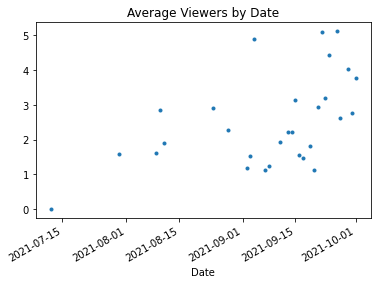

In [36]:
ca.query('streamed').set_index('Date')['Average_Viewers'] \
    .plot(style='.',
          title='Average Viewers by Date')

In [37]:
ca['Dateint'] = ca['Date'].view('int')

<AxesSubplot:xlabel='Dateint', ylabel='Average_Viewers'>

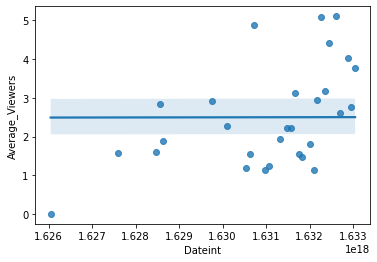

In [38]:

sns.regplot(data=ca.query('streamed'), x='Dateint', y='Average_Viewers')